##### __In this project we analyze the Global superstore dataset, we look at key variables like sales, prices etc at different aggregation levels. Further we try to check for outliers and correlations__

__importing required libraries__


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline


__reading in sales data file and listing column names, types and preview of first 5 rows__

In [ ]:
sales_data = pd.read_csv('sales.csv',parse_dates=[2])
sales_data.head()


__the row id column is not required and should be dropped__

In [3]:
sales_data=sales_data.iloc[:,1:]

__checking for missing values__

In [4]:
sales_data.isnull().sum()

Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Country          0
Market           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

__there are no missing values hence we can proceed with our analysis__

__Aggregating sales by Month-Year combination to look at general sales trend__

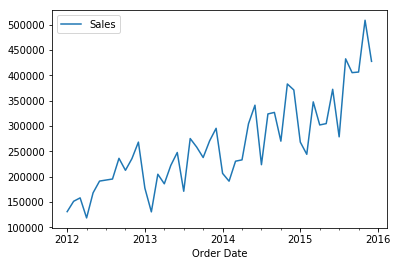

In [13]:
Daily_sales=pd.DataFrame(sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['Sales'].sum())
Daily_sales.reset_index()
Daily_sales.plot()



__As visible in the plot we see that the sales have been rising constantly since 2012, We also see a seasonal trend in sales with the highest peak in december every year__

In [16]:
sales_data.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,CA-2014-AB10015140-41954,2014-11-11,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77
1,IN-2014-JR162107-41675,2014-05-02,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63
2,IN-2014-CR127307-41929,2014-10-17,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49
3,ES-2014-KM1637548-41667,2014-01-28,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16
4,SG-2014-RH9495111-41948,2014-05-11,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04


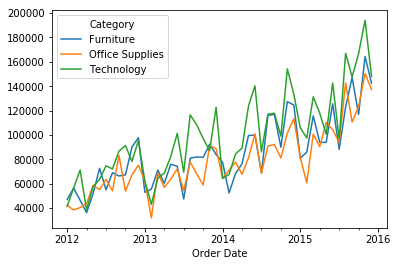

In [20]:
pd.pivot_table(data=sales_data,values='Sales',index=sales_data['Order Date'].dt.to_period('M'),columns='Category',aggfunc=np.sum).plot()


__It is seen that all categories have a rising trend in the long term and also follow the seasonal trend, The sales of technology category are however higher and show higher peaks as compared to other categories__

__let us check the price volitality of each category, do all categories have same variation amongs prices? For this we should first normalize the prices for each category so that the price variations can be compared across categories__


In [21]:
min_max_scaler=preprocessing.MinMaxScaler()

sales_data['Price']=sales_data['Sales']/sales_data['Quantity']

Furniture_prices=pd.DataFrame(sales_data[sales_data['Category']=='Furniture']['Price'].values.astype(float))
Furniture_scaled=min_max_scaler.fit_transform(Furniture_prices)

Office_prices=pd.DataFrame(sales_data[sales_data['Category']=='Office Supplies']['Price'].values.astype(float))
Office_scaled=min_max_scaler.fit_transform(Office_prices)

Tech_prices=pd.DataFrame(sales_data[sales_data['Category']=='Technology']['Price'].values.astype(float))
Tech_scaled=min_max_scaler.fit_transform(Tech_prices)

Variations=[np.std(Office_scaled),np.std(Furniture_scaled),np.std(Tech_scaled)]
Variations



[0.03793800457145946, 0.13433151212180341, 0.04101012242133017]

__Standard deviation for furniture is the maximum this shows that the prices of furniture vary more than office supplies or Tech__


In [22]:
sales_data.groupby('Category')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,9860.0,120.465538,124.137344,1.165,36.891667,77.310714,151.226667,925.23
Office Supplies,31289.0,35.474250,71.690886,0.335,8.240000,15.750000,32.320000,1889.99
Technology,10141.0,135.841641,154.709703,0.790,45.953333,95.990000,169.680000,3773.08




__the summary statistics and box plots show that there is presence of extreme outliers in the data,this is possibly because we are calculating approx prices as a daily quantity/ daily sales because the original price column is absent ideally a column that shows average price of each transation would be a better measure to look at each category is further divided in subcategories and so we can look at prices by sub category to find if the outliers exist because of a particular sub category, an example of this is below for the furniture category__

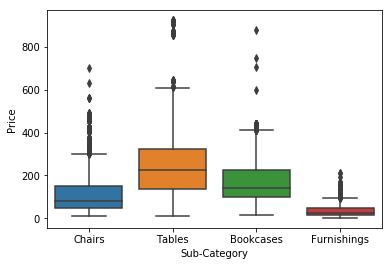

In [293]:
sns.boxplot(x='Sub-Category',y='Price',data=sales_data[sales_data['Category']=='Furniture'])

__The heat map below shows the correlation of all the numeric variables in the data set, we can see that there is not a  high correlation between sales and discounts or between quantity and discounts which is normally expected, but in this case we have seen that most of 
sales peak in december each year which is a festive season and hence people buy regardless of discount, looks likediscounts don't generally work and hence should be stopped or better promoted.__

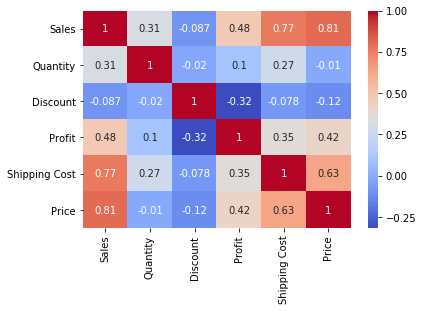

In [318]:
sns.heatmap(sales_data.iloc[:,1:].corr(),annot=True,cmap='coolwarm')